## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import os
import gc

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#from tqdm import tqdm
#import autoviz
#import dtale
import pandas_profiling

import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max.columns", None)

#for AWS Sagemaker
#import boto3, botocore
#from sagemaker import get_execution_role

In [2]:
#for Google Colab
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#for ASW sagemaker.
"""
role = get_execution_role()

BUCKET = 'sam-ml-stuffs'
PREFIX = 'economic-wellbeing-data'
train_key = 'Train.csv'
test_key = 'Test.csv'
sample_key = 'SampleSubmission.csv'
"""

"\nrole = get_execution_role()\n\nBUCKET = 'sam-ml-stuffs'\nPREFIX = 'economic-wellbeing-data'\ntrain_key = 'Train.csv'\ntest_key = 'Test.csv'\nsample_key = 'SampleSubmission.csv'\n"

In [ ]:
#for AWS sagemaker
"""
train = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, train_key))
test = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, test_key))
sample = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, sample_key))
"""

"\ntrain = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, train_key))\ntest = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, test_key))\nsample = pd.read_csv('s3://{}/{}/{}'.format(BUCKET, PREFIX, sample_key))\n"

In [ ]:
"""
MAIN_PATH = os.getcwd()
MAIN_PATH
"""

'\nMAIN_PATH = os.getcwd()\nMAIN_PATH\n'

In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")
MAIN_PATH = os.getcwd()
MAIN_PATH

'/content/drive/MyDrive/Colab Notebooks'

In [4]:
train = pd.read_csv(os.path.join(MAIN_PATH, "economic-wellbeing-data/Train.csv"))
test = pd.read_csv(os.path.join(MAIN_PATH, "economic-wellbeing-data/Test.csv"))
sample = pd.read_csv(os.path.join(MAIN_PATH, "economic-wellbeing-data/SampleSubmission.csv"))

## Exploratory Data Analysis

In [5]:
Train = train.copy()
Test = test.copy()
Train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [ ]:
Test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [ ]:
Train.shape, Test.shape

((21454, 19), (7194, 18))

In [ ]:
Train.country.unique()

array(['Ethiopia', 'Mozambique', 'Malawi', 'Guinea', 'Cameroon', 'Ghana',
       'Senegal', 'Kenya', 'Tanzania', 'Mali', 'Swaziland', 'Rwanda',
       'Nigeria', 'Lesotho', 'Sierra Leone', 'Central African Republic',
       "Cote d'Ivoire", 'Togo'], dtype=object)

In [ ]:
Test.country.unique()

array(['Democratic Republic of Congo', 'Uganda', 'Burkina Faso', 'Zambia',
       'Angola', 'Zimbabwe', 'Benin'], dtype=object)

## Data Visulaization

In [6]:
def plot_histogram(table,col, bins = 10):
  """
  This function plots histogram of numerical columns present in teh data

  args:
    table: a tabular data
    col: a numerical columns

  returns:
    returns a histogram of the numerical columns
  """

  for col in cols:
      fig = plt.figure(figsize=(6,6))
      ax = fig.gca()
      table[col].plot.hist(ax = ax, bins = bins, color='blue')
      ax.set_title("Histogram of " + col)
      ax.set_xlabel(col)
      ax.set_ylabel("Number of Count")
      plt.show()

In [7]:
def categorical_plot(table, col, bins = 10):
  """
  This function plots categorical columns present in teh data

  args:
    table: a tabular data
    col: a categorical columns

  returns:
    returns a histogram of the categorical columns
  """

  data = dict(pd.value_counts(table[col]))
  #fig, ax = plt.subplots()
  ax = fig.gca()
  ax.bar(data.keys(), data.values(), color = "lightgray")
  ax.set_title("Categorical Plotting")
  ax.set_ytitle("Number of count")
  ax.set_xtitle("Histogram of " + col)
  plt.show()    

In [8]:
def numerical_cols(data):
  """
  This function gets the numerical columns

  args:
    This function takes in a tabular data

  returns:
   This function returns a list of numerical columns present in the data
  """
  num_cols = []
  for col in data.columns:
    if data[col].dtype == 'float64':
      num_cols.append(col)
    elif data[col].dtype == 'int64':
      num_cols.append(col)
  return num_cols

def categorical_columns(data):
  """
  This function gets the categorical columns

  args:
    This function takes in a tabular data

  returns:
   This function returns a list of catrgorical columns present in the data
  """
  cat_cols = []
  for col in data.columns:
      if data[col].dtype == 'object':
          cat_cols.append(col)
  return cat_cols

In [9]:
def outlier_check(num_col, y, data):
  """
  This function check for outlier in numerical columns

  args:
    num_col: a numerical colums
    target: the target of the data

  returns:
    returns a plot of outlier
  """

  fig, ax = plt.subplots()
  ax.scatter(x = data[num_col], y = data[y])
  plt.ylabel(y, fontsize=13)
  plt.xlabel(num_col, fontsize=13)
  plt.show()

In [ ]:
Train.hist(figsize=(25,20))

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'ghsl_water_surface'}>,
        <AxesSubplot:title={'center':'ghsl_built_pre_1975'}>,
        <AxesSubplot:title={'center':'ghsl_built_1975_to_1990'}>],
       [<AxesSubplot:title={'center':'ghsl_built_1990_to_2000'}>,
        <AxesSubplot:title={'center':'ghsl_built_2000_to_2014'}>,
        <AxesSubplot:title={'center':'ghsl_not_built_up'}>,
        <AxesSubplot:title={'center':'ghsl_pop_density'}>],
       [<AxesSubplot:title={'center':'landcover_crops_fraction'}>,
        <AxesSubplot:title={'center':'landcover_urban_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_permanent_10km_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_seasonal_10km_fraction'}>],
       [<AxesSubplot:title={'center':'nighttime_lights'}>,
        <AxesSubplot:title={'center':'dist_to_capital'}>,
        <AxesSubplot:title={'center':'dist_to_shoreline'}>,
        <AxesSubplot:>]], dtype=obje

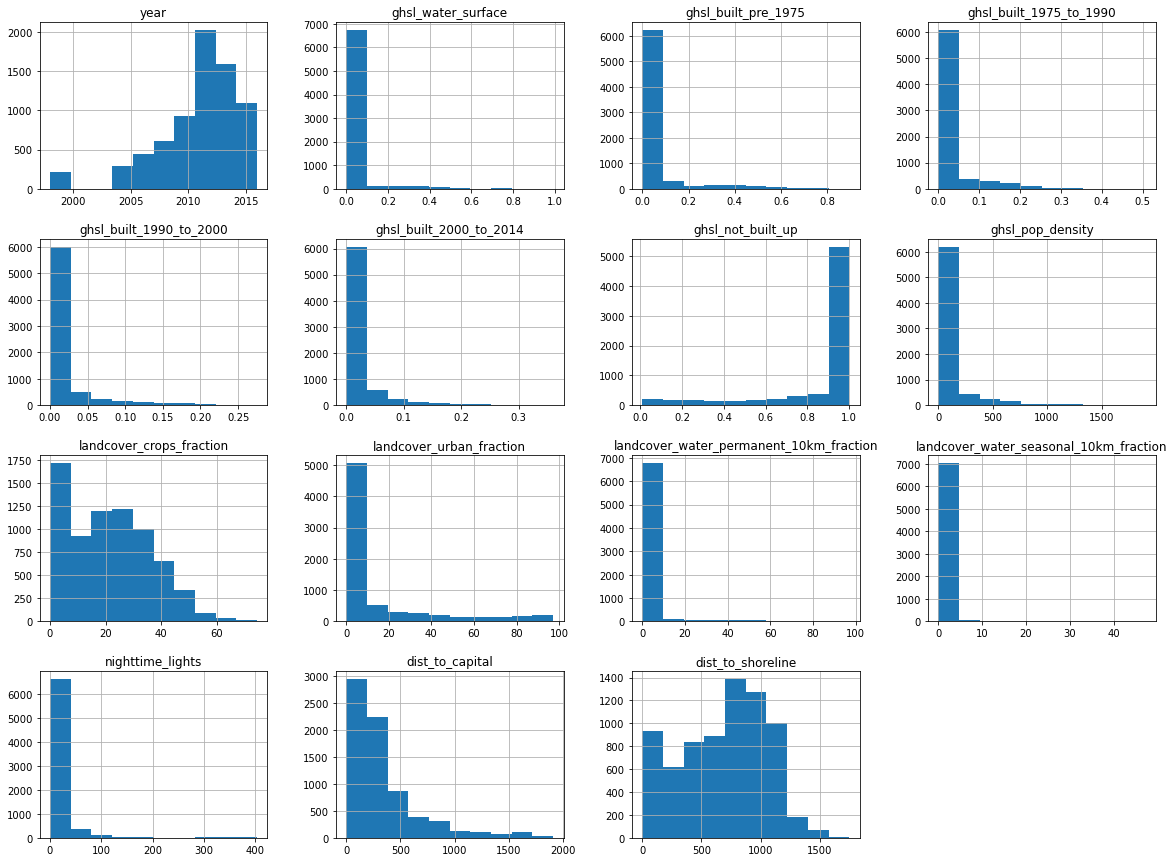

In [ ]:
Test.hist(figsize=(20,15))

In [ ]:
high = pd.DataFrame(Train[Train['Target'] >= 0.7])#.tail(5)
low = pd.DataFrame(Train[Train['Target'] <= 0.4])
len(high), len(low)
#results shows the data is not evenly distributed i.e there is a class imbanlace

(1182, 13865)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'ghsl_water_surface'}>,
        <AxesSubplot:title={'center':'ghsl_built_pre_1975'}>,
        <AxesSubplot:title={'center':'ghsl_built_1975_to_1990'}>],
       [<AxesSubplot:title={'center':'ghsl_built_1990_to_2000'}>,
        <AxesSubplot:title={'center':'ghsl_built_2000_to_2014'}>,
        <AxesSubplot:title={'center':'ghsl_not_built_up'}>,
        <AxesSubplot:title={'center':'ghsl_pop_density'}>],
       [<AxesSubplot:title={'center':'landcover_crops_fraction'}>,
        <AxesSubplot:title={'center':'landcover_urban_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_permanent_10km_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_seasonal_10km_fraction'}>],
       [<AxesSubplot:title={'center':'nighttime_lights'}>,
        <AxesSubplot:title={'center':'dist_to_capital'}>,
        <AxesSubplot:title={'center':'dist_to_shoreline'}>,
        <AxesSubplot:title={'center'

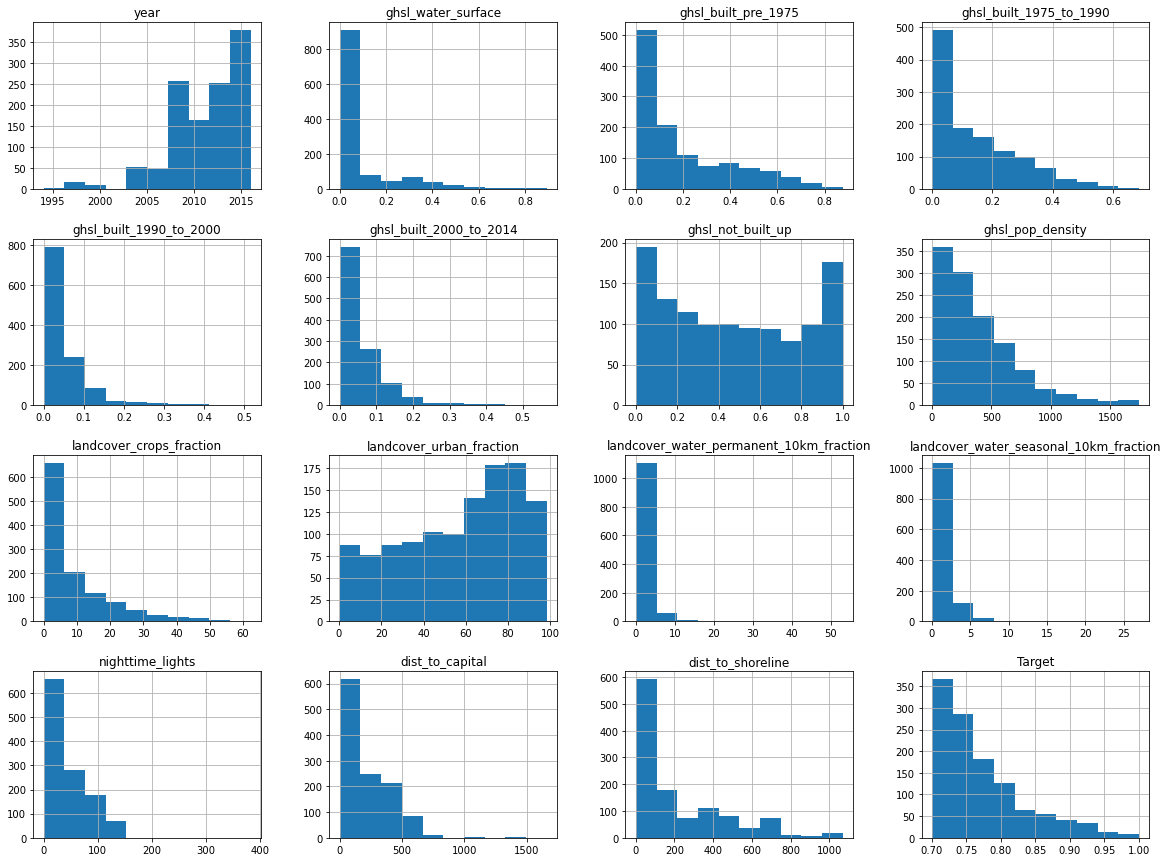

In [ ]:
high.hist(figsize=(20,15))

In [ ]:
low.hist(figsize=(20,15))

In [ ]:
Train.corr().style.background_gradient(cmap='coolwarm')

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
year,1.000000,-0.012947,-0.083721,-0.038382,-0.018690,0.017530,0.057279,-0.048618,0.082205,-0.055750,0.034326,-0.054697,-0.028213,0.019710,-0.015886
ghsl_water_surface,-0.012947,1.000000,0.197961,0.110012,0.040389,0.034900,-0.533573,0.137382,-0.221121,0.246438,0.639638,0.185985,0.171599,-0.030484,-0.152016
ghsl_built_pre_1975,-0.083721,0.197961,1.000000,0.474982,0.464407,0.281641,-0.821521,0.816594,-0.337366,0.804210,0.079085,0.053655,0.746656,-0.147007,-0.186005
ghsl_built_1975_to_1990,-0.038382,0.110012,0.474982,1.000000,0.451552,0.445210,-0.713104,0.658810,-0.298848,0.750170,0.042565,0.070884,0.567003,-0.186747,-0.151022
ghsl_built_1990_to_2000,-0.018690,0.040389,0.464407,0.451552,1.000000,0.574375,-0.614719,0.507582,-0.257735,0.638640,0.017545,0.017371,0.414382,-0.166710,-0.142295
ghsl_built_2000_to_2014,0.017530,0.034900,0.281641,0.445210,0.574375,1.000000,-0.531842,0.416470,-0.226773,0.587058,0.003370,0.023246,0.355522,-0.167433,-0.088179
ghsl_not_built_up,0.057279,-0.533573,-0.821521,-0.713104,-0.614719,-0.531842,1.000000,-0.791663,0.415382,-0.902559,-0.305384,-0.126775,-0.720076,0.191176,0.230617
ghsl_pop_density,-0.048618,0.137382,0.816594,0.658810,0.507582,0.416470,-0.791663,1.000000,-0.323615,0.860147,0.044945,0.038811,0.761638,-0.162155,-0.164513
landcover_crops_fraction,0.082205,-0.221121,-0.337366,-0.298848,-0.257735,-0.226773,0.415382,-0.323615,1.000000,-0.377178,-0.112033,-0.096018,-0.304454,-0.055470,0.281731
landcover_urban_fraction,-0.055750,0.246438,0.804210,0.750170,0.638640,0.587058,-0.902559,0.860147,-0.377178,1.000000,0.059166,0.066508,0.761303,-0.214692,-0.214850


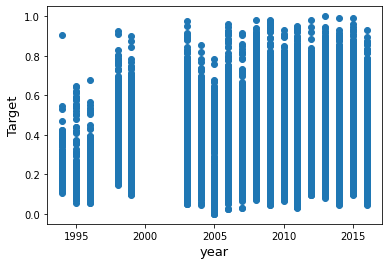

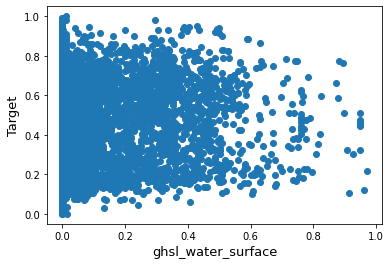

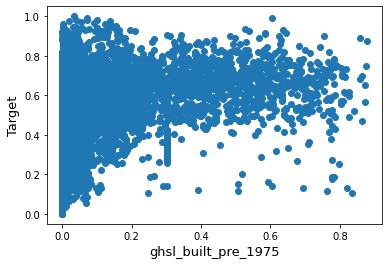

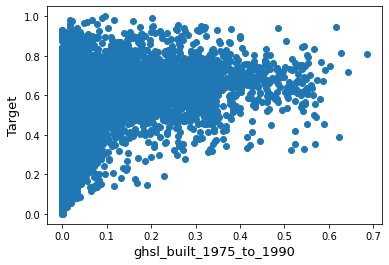

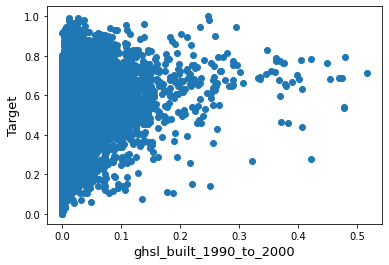

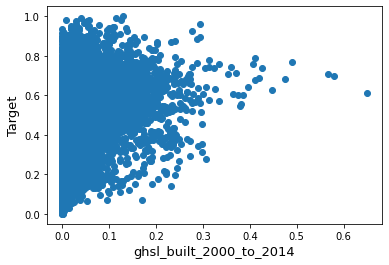

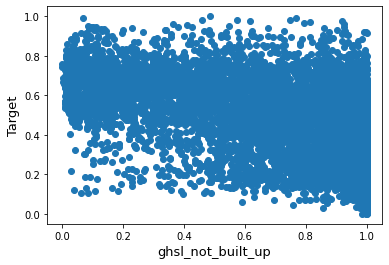

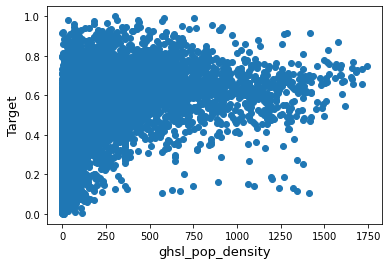

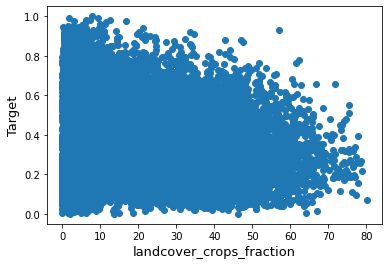

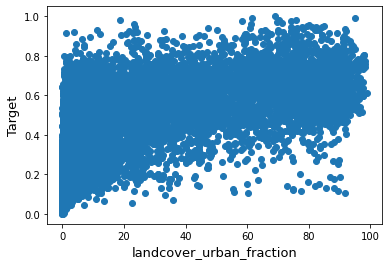

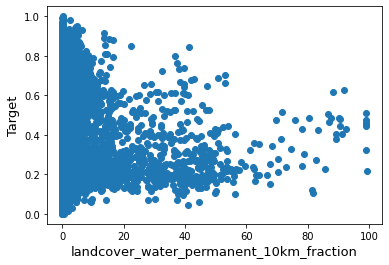

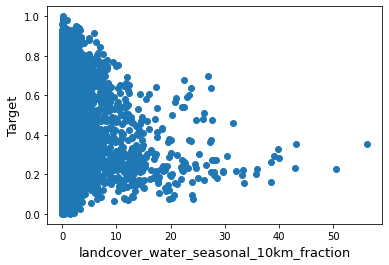

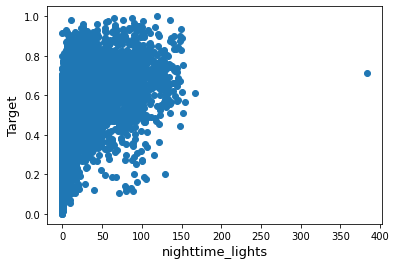

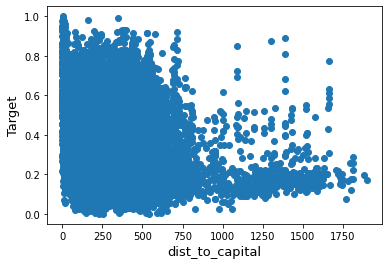

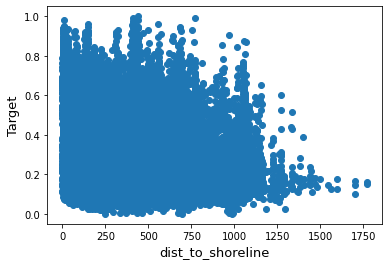

In [ ]:
#checking for outliers
num_cols = numerical_cols(Train)
for num_col in num_cols[:-1]:
    outlier_check(num_col, 'Target', Train)

In [ ]:
np.mean(Train['Target']), min(Train['Target']), max(Train['Target'])#(0.35073609036460734, 0.0, 1.0)

(0.29072538125468683, 0.0, 0.6931471805599453)

# Atrributes of Data and Observation of EDA
- Train data entirely diffrent from test data in terms of atrributes
- No missing data
- Normalization is neccesary due to the diffrence of figures within features
- Data was generated
- Cross-validation and addition of data is neccesary
- Split method was combined i.e random row wise split and country ID
- Data contains representation of more low income folks than high income folks
- There are meaningful diffrences between features of low income folks and high income folks so all features should be considered

- Use all features
- Cross validation
- Train on both Train and Test data


## Extract Transform Load (ETL)

- build a baseline model
- Analyze data

In [10]:
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8 MB 4.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [11]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.svm import SVR# should be used for data labels with less than 10000 samples.
from xgboost import XGBRegressor#as xgb
from lightgbm import LGBMRegressor#as lgb
#import statsmodel.api as sm

In [12]:
def convertCatVar(cols, data_):
    """
    This function converts categorical variables to numerical variables
    
    args: 
      Takes in list of categorical variables and dataset to transform
    
    returns:
      Return a cat transformed dataset
    """

    lencoder = LabelEncoder()
    for col in cols:
        data_[col] = lencoder.fit_transform(data_[col].astype(str))

In [13]:
ntrain = Train.shape[0]
ntest = Test.shape[0]
ntrain, ntest

(21454, 7194)

In [14]:
y = Train['Target']
data = pd.concat((Train, Test)).reset_index(drop=True)
data.drop(['Target', 'ID'], axis=1, inplace=True)
del Train, Test
gc.collect
data.shape, y.shape

((28648, 17), (21454,))

In [18]:
#adding colums that have similar attributes
data['all_ghsl'] = data['ghsl_built_1975_to_1990']+ data['ghsl_built_1990_to_2000']+ data['ghsl_built_2000_to_2014']+ data['ghsl_built_pre_1975']
data['all_landcover_fraction'] = data['landcover_crops_fraction']+ data['landcover_urban_fraction']
data['all_waters'] = data['landcover_water_permanent_10km_fraction']+ data['landcover_water_seasonal_10km_fraction']

In [ ]:
data.head()

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,all_ghsl,all_landcover_fraction,all_waters
0,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.000592,26.369143,0.000000
1,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.000128,64.737481,0.005427
2,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.000000,4.531996,0.003078
3,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.000805,27.396507,11.424876
4,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.146467,27.897604,0.135523


In [19]:
#convert categorical var
cat_cols = categorical_columns(data)
convertCatVar(cat_cols, data)

In [ ]:
def splitData(trainset, testset, size):
    x_train, x_val, y_train, y_val = train_test_split(trainset, testset, test_size = size, random_state=2021)
    return x_train, x_val, y_train, y_val

In [ ]:
pandas_profiling.ProfileReport(data)

In [ ]:
print(model.pvalues)

### Using Grid search with various models and stacking

### Own CV

In [20]:
ctrain = data[:ntrain] #cleanedtrain
ctest = data[ntrain:]
SEED = 42
NFOLDS = 5
kf = KFold(n_splits=NFOLDS)
#kf.get_n_splits(ctrain)
#gkf = kf.split(ctrain)

In [ ]:
#splitting data for grid search
#THIS LINE SHOULD ONLY BE EXECUTED ONCE SINCE YOU ONLY NEED THE VALUES FOR THE PARAMETERS
gsx_train, gsx_test, gsy_train, gsy_test = splitData(ctrain, y, 0.3)
gsx_train.shape, gsy_train.shape, gsx_test.shape, gsy_test.shape

((15017, 20), (15017,), (6437, 20), (6437,))

In [ ]:
# lasso
tuned_parameters = [{'max_iter':[300, 500, 800, 1000], 
                     "alpha":[0.0005], "selection":['random','cyclic'],
                    "tol":[1e-4, 1e-2, 1e-8]}]
MSE_lasso = ['mean_squared_error(gsy_test,gsy_pred2)']
for value in MSE_lasso:
    lregr = GridSearchCV(Lasso(), tuned_parameters, cv=5)
    lregr.fit(gsx_train, gsy_train)
    gsy_true, gsy_pred2 = gsy_test, lregr.predict(gsx_test)

print("The best hyper-parameters for Lasso are: ", lregr.best_params_)

In [ ]:
# elasticnet
tuned_parameter = [{'max_iter':[300, 500, 900, 1000], 'l1_ration':[0,0.5,0.9,1]}]
MSE_ENet = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ENet:
    enregr = GridSearchCV(ElasticNet(), tuned_parameters, cv=5)
    enregr.fit(gsx_train, gsy_train)
    gsy_true, gsy_pred3 = gsy_test, enregr.predict(gsx_test)

print("The best hyper-parametes for ENet are: ", enregr.best_params_)

In [ ]:
# SDG
tuned_parameters = [{'max_iter':[300, 500, 900, 1000, 1300], 'l1_ratio':[0.5,0.9,1], 'tol':[1e-1, 1e-3, 1e-5]}]
MSE_SDG = ['mean_squared_error(gsy_test,gsy_pred4)']
for value in MSE_SDG:
    enrsdg = GridSearchCV(SGDRegressor(), tuned_parameters, cv=5)
    enrsdg.fit(gsx_train, gsy_train)
    gsy_true, gsy_pred4 = gsy_test, enrsdg.predict(gsx_test)

print("The best hyper-parametes for SDG are: ", enrsdg.best_params_)

In [ ]:
class ModelTrainer(object):
    """
        This class helps to train diffrent models
    """
    def __init__(self, clf, seed=42, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
        
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def feature_importance(self, x, y):
        print(self.clf.fit(x,y).feature_importances_)

In [ ]:
#OOF Predictions
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    #split kfolds (SKF)
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    for i, (train_index, test_index) in enumerate(kf.split(ctrain)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr, y_tr)
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
#Models Parameters
#Lasso parameters
ls_params = {
    'alpha':0.0005,
    'max_iter':800,
    'selection':'random',
    'tol':0.01,
    'random_state':42
}

enet_params = {
    'alpha':0.0005,
    'selection':'random',
    'max_iter':500,
    'l1_ratio':.9,
    'tol':0.01,
    'random_state':42
}

krr_params = {
    'alpha':.6,
    'kernel':'polynomial',
    'degree':2,
    'coef0':2.5
}

sgd_params = {
    'l1_ratio': 0.5,
    'max_iter': 500,
    'tol': 0.1
}

gbr_params = {
    'n_estimators':3000,
    'learning_rate':0.05,
    'max_depth':4,
    'max_features':'sqrt',
    'min_samples_leaf':15,
    'min_samples_split':10,
    'loss':'huber',
    'random_state':42
}

xgb_params = {
    'colsample_bytree':0.4603,
    'gamma':0.0468,
    'learning_rate':0.05,
    'max_depth':3,
    'min_child_weight':1.7817,
    'n_estimators':2200,
    'reg_alpha':0.4640,
    'reg_lambda':0.8571,
    'subsample':0.5213,
    'silent':1,
    'random_state':42,
    'nthread':-1
}

lgb_params = {
    'objective':'regression',
    'boosting_type':'gbdt',
    'metric':'rmse',
    'num_leaves':150,
    'learning_rate':0.05,
    'n_estimators':1520,
    'max_bin':95,
    'min_data_in_leaf':30,
    'num_iterations':1510,
    'max_depth':4
}

ada_params = {
    'n_estimators':1000,
    'learning_rate':0.06,
    #'base_estimator':'svr_',
    'random_state':42
}

In [ ]:
#base model for adaboost
svr_ = SVR(kernel='linear')

#create objects to represent models
ls = ModelTrainer(clf= Lasso, seed=SEED, params=ls_params)
enet = ModelTrainer(clf= ElasticNet, seed=SEED, params=enet_params) 
#krr = ModelTrainer(clf= KernelRidge, params=krr_params)
sgd = ModelTrainer(clf= SGDRegressor, seed=SEED, params=sgd_params)
gbr = ModelTrainer(clf= GradientBoostingRegressor, seed=SEED, params=gbr_params)
xgb = ModelTrainer(clf= XGBRegressor, seed=SEED, params=xgb_params)
lgb = ModelTrainer(clf= LGBMRegressor, seed=SEED, params=lgb_params)
ada = ModelTrainer(clf= AdaBoostRegressor, seed=SEED, params=ada_params)

In [ ]:
#creating numpy array of train, test, target of our df
y_train = y.ravel()
x_train = ctrain.values #Creates an array of the train data
x_test = ctest.values #Creates an array of the test data

In [ ]:
#Crreating OOF train and prediction sets
print("{} training has began.... \n.......".format('Lasso'))
ls_oof_train, ls_oof_test = get_oof(ls, x_train, y_train, x_test) #ls
print("{} training has ended \n".format("Lasso"))
print("{} training has began.... \n.......".format('ElasticNet'))
enet_oof_train, enet_oof_test = get_oof(enet, x_train, y_train, x_test) #ene_
print("{} training has ended \n".format("ElasticNet"))
print("{} training has began.... \n.......".format('KernelRidge'))
#krr_oof_train, krr_oof_test = get_oof(krr, x_train, y_train, x_test) #krr
print("{} training has ended \n".format("KernelRidge"))
print("{} training has began.... \n.......".format('SVM'))
sgd_oof_train, sgd_oof_test = get_oof(sgd, x_train, y_train, x_test) #svr
print("{} training has ended \n".format("SVM"))
print("{} training has began.... \n.......".format('Gradient Boost'))
gbr_oof_train, gbr_oof_test = get_oof(gbr, x_train, y_train, x_test) #gbr
print("{} training has ended \n".format("Gradient Boost"))
print("{} training has began.... \n.......".format('XGBoost'))
xgb_oof_train, xgb_oof_test = get_oof(xgb, x_train, y_train, x_test) #xgb
print("{} training has ended \n".format("XGBoost"))
print("{} training has began.... \n.......".format('LightGBM'))
lgb_oof_train, lgb_oof_test = get_oof(lgb, x_train, y_train, x_test) #lgb
print("{} training has ended \n".format("LightGBM"))
print("{} training has began.... \n.......".format('Ada Boost'))
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) #ada
print("{} training has ended \n".format("Ada Boost"))
print("Training is complete!!")

Lasso training has began. 
.......
Lasso training has ended 

ElasticNet training has began. 
.......
ElasticNet training has ended 

KernelRidge training has began 
.......
KernelRidge training has ended 

SVM training has began 
.......
SVM training has ended 

Gradient Boost training has began 
.......
Gradient Boost training has ended 

XGBoost training has began 
.......
XGBoost training has ended 

LightGBM training has began 
.......
LightGBM training has ended 

Ada Boost training has began 
.......
Ada Boost training has ended 

Training is complete!!


In [ ]:
#Getting feature importance for each boosting models
gbr_features = gbr.feature_importance(x_train, y_train)
xgb_features = xgb.feature_importance(x_train, y_train)
lgb_features = lgb.feature_importance(x_train, y_train)
ada_features = ada.feature_importance(x_train, y_train)

[0.04616647 0.05998477 0.08814578 0.00243608 0.06955574 0.06513715
 0.00930669 0.00698521 0.01365947 0.0525698  0.01364184 0.06374555
 0.003955   0.00552016 0.29106741 0.02409937 0.03706923 0.12958179
 0.01273976 0.00463272]
[0.02223312 0.02948013 0.5318522  0.00520271 0.00553551 0.01673702
 0.00755122 0.00540483 0.01397084 0.044125   0.00690486 0.04705381
 0.00462503 0.00489731 0.1857271  0.01046443 0.01879407 0.02569275
 0.0092165  0.00453159]
[1595 1377  289  594  900  797 1014  960  631 1067 1338 1186  660  852
 1397 1435 1586  494 1029  554]
[0.06274081 0.09645494 0.11384644 0.         0.00443843 0.04992147
 0.0046432  0.00218069 0.004314   0.00766167 0.01980045 0.07406787
 0.00730558 0.00703573 0.3869347  0.08773783 0.03903585 0.00168565
 0.02802174 0.00217294]


[0.04616647 0.05998477 0.08814578 0.00243608 0.06955574 0.06513715
 0.00930669 0.00698521 0.01365947 0.0525698  0.01364184 0.06374555
 0.003955   0.00552016 0.29106741 0.02409937 0.03706923 0.12958179
 0.01273976 0.00463272]


IndexError: ignored

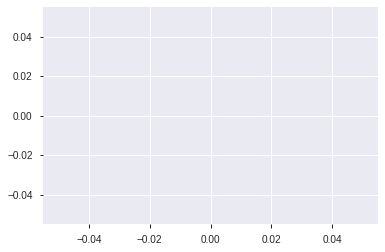

In [ ]:
(pd.Series(gbr.feature_importance(x_train, y_train), index=ctrain.columns)
   .nlargest(4)
   .plot(kind='barh').invert_yaxis())

In [ ]:
gbr_features=[0.05158923, 0.05996943, 0.10435466, 0.00279059, 0.04662176, 0.11849202, 
              0.01515657, 0.00907154, 0.05389675, 0.0962652,  0.01645272, 0.09794197,
              0.00551636, 0.00658199, 0.25559438, 0.02497005, 0.03473477]
xgb_features=[0.02272162, 0.03546064, 0.5183776,  0.0050887,  0.00980836, 0.01802973,
              0.00596736, 0.00674314, 0.00739339, 0.02504866, 0.00776571, 0.12762952,
              0.00537983, 0.00539455, 0.17076913, 0.01097729, 0.01744475,]
lgb_features=[314, 507, 76, 81, 71, 243, 73, 143, 81, 235, 100, 219, 84, 173, 104, 145, 231]
ada_features=[5.78150581e-02, 9.20212133e-02, 1.15102371e-01, 1.68972837e-04,
              3.95986092e-03, 5.07882596e-02, 5.25823088e-03, 7.62954666e-04,
              2.80371621e-03, 8.26046228e-03, 2.51995708e-02, 8.14236844e-02,
              1.00984385e-02, 7.35377402e-03, 4.10561750e-01, 9.17879569e-02,
              3.66337255e-02]

In [ ]:
#Base Predictions
base_predictions_train = pd.DataFrame({
    'Lasso': ls_oof_train.ravel(),    
    'ElasticNet': enet_oof_train.ravel(),
    #'KernelRidge': krr_oof_train.ravel(),
    'SGD': sgd_oof_train.ravel(),
    'GBM': gbr_oof_train.ravel(),
    'XGB': xgb_oof_train.ravel(),
    'LGB': lgb_oof_train.ravel(),
    'ADA': ada_oof_train.ravel(),
})
base_predictions_train.head()

,Lasso,ElasticNet,SGD,GBM,XGB,LGB,ADA
0,0.250598,0.250302,-2.900468e+14,0.185198,0.185855,0.183910,0.255949
1,0.226568,0.226742,-6.783665e+14,0.158614,0.111083,0.162540,0.255949
2,0.231549,0.231632,-9.039112e+14,0.140597,0.145369,0.140071,0.260162
3,0.263721,0.263937,-4.280000e+14,0.250212,0.261924,0.234832,0.298296
4,0.525454,0.525808,-8.563707e+14,0.513971,0.505099,0.535638,0.466743


In [ ]:
#Correlation heatmap of the second level training set
chst = [
    go.Heatmap(
    z= base_predictions_train.astype(float).corr().values,
    x= base_predictions_train.columns.values,
    y= base_predictions_train.columns.values,
    colorscale='Viridis', showscale=True, reversescale=True)
]
py.iplot(chst, filename='labeled-heatmap')

"""
Note: There are a few articles that have suggested that they are merits
of having trained models that are more uncorrelated with one and other
produce better results.
"""

'\nNote: There are a few articles that have suggested that they are merits\nof having trained models that are more uncorrelated with one and other\nproduce better results.\n'

In [ ]:
x_train = np.concatenate((ls_oof_train, enet_oof_train,
                          gbr_oof_train, xgb_oof_train,
                          lgb_oof_train, ada_oof_train), axis=1)
x_test = np.concatenate((ls_oof_test, enet_oof_test,
                         gbr_oof_test, xgb_oof_test,
                         lgb_oof_test, ada_oof_test), axis=1)

In [ ]:
#Best to use a linear model as the meta-model
sgd_train = SGDRegressor(l1_ratio=0.5, max_iter=500, tol=0.1).fit(x_train, y_train)
predictions = sgd_train.predict(x_test)
predictions.mean()

0.33149321082958416

In [ ]:
# Generate Submission File 
StackingSub = pd.DataFrame({'ID':sample['ID'], 'Target': predictions})
StackingSub.to_csv('stackingSub.csv', index=False)

In [ ]:
#save model
filename = 'final_model.sav'
pickle.dump(sgd_train, open(filename, 'wb'))

In [ ]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(data, y)
print(result)

In [23]:
features = [x for x in data.columns if x not in ['ID','country','urban_or_rural','Target','year']]

In [24]:
def get_model(Name='lgbm'):
  if Name == 'lgbm':
    return LGBMRegressor(**{
        'objective' :'regression','boosting_type' : 'gbdt','metric': 'rmse' ,
        'learning_rate' : 0.05,'num_iterations': 1500,'max_depth' :4 ,'num_leaves' : 150,
        'max_bins': 85,'min_data_in_leaf':30,'reg_lambda' :75
    })

In [25]:
Model_Name = "lgbm"
train_ = ctrain[features]
test_ = ctest[features]

In [33]:
nfolds = KFold(n_splits=10, shuffle=True, random_state=42)
oofs = np.zeros((len(train_)))
test_predictions = np.zeros((len(test_)))

for fold, (trn_idx, val_idx) in enumerate(nfolds.split(train_, y)):
  x_trn, y_trn = train_.iloc[trn_idx], y.iloc[trn_idx]
  x_val, y_val = train_.iloc[val_idx], y.iloc[val_idx]

  clf = get_model(Name=Model_Name)
  clf.fit(x_trn, y_trn, eval_set=[(x_val, y_val)], verbose=0, early_stopping_rounds=50)

  vp = clf.predict(x_val)
  oofs[val_idx] = vp
  val_score = mean_squared_error((vp), (y_val), squared=False)
  print(4*'---- --- ----')
  print(f'fold {fold+1}   Val score: {val_score}')
  print(4*'-- --- ---')

  tp = clf.predict(test_)
  test_predictions += tp / nfolds.n_splits

print()
print(3*'###', 10*"^", 3*'###')
print(mean_squared_error(y, oofs, squared=False))


---- --- -------- --- -------- --- -------- --- ----
fold 1   Val score: 0.1073980313557577
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 2   Val score: 0.10911173414216847
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 3   Val score: 0.10556719690484587
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 4   Val score: 0.10761429792684304
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 5   Val score: 0.10404222875081978
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 6   Val score: 0.10609231120400314
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 7   Val score: 0.10491151846903067
-- --- ----- --- ----- --- ----- --- ---
---- --- -------- --- -------- --- -------- --- ----
fold 8   V

In [39]:
n_sub = pd.DataFrame({'ID':sample['ID'], 'Target': test_predictions})
#np.clip provides a limit for our submission file interval within the provided limit.
n_sub.to_csv('stackingSub-1.csv', index=False)

In [36]:
test_predictions.max(), test_predictions.min(), test_predictions.mean()

(0.7833293671383459, 0.06672890476717307, 0.3219274399391191)